In [1]:
## Preparation of assocaition Rule ##

In [2]:
## Problem Statmen:Prepare rules for the all the data sets 
##Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
##2) Change the minimum length in apriori algorithm
##3) Visulize the obtained rules using different plots 


In [3]:
import pandas as pd

In [5]:
!pip install mlxtend

In [6]:
from mlxtend.frequent_patterns import apriori, association_rules

In [7]:
##import the data

In [8]:
my_movies=pd.read_csv("C:/Users/hp/Desktop/Revannath Data Sci/Assignments/9-Association Rule/my_movies.csv")

In [9]:
##Provided data is provided for the two combination of data havingf dummy and original data colomn

In [10]:
##We will separate them and creating the data frame

In [11]:
movies = my_movies.iloc[:,5:] ##require the binary data to work so we have extracted the binary data

In [12]:
frequent_movies = apriori(movies,min_support  = 0.2, max_len = 2,use_colnames = True)

In [13]:
frequent_movies.describe()

,support
count,12.000000
mean,0.383333
std,0.203753
min,0.200000
25%,0.200000
50%,0.300000
75%,0.600000
max,0.700000


In [14]:
##Sorting most frequent movies according to support##

In [15]:
frequent_movies.sort_values('support',ascending = False, inplace = True)

In [16]:
movie_rules = association_rules(frequent_movies, metric = "confidence",min_threshold = 0.85)

In [17]:
##various values of support and confidence we have narrowed down our rules too 5

In [18]:
def to_list(i):
    return(sorted(list(i)))

In [19]:
ma_movies = movie_rules.antecedents.apply(to_list)+movie_rules.consequents.apply(to_list)

In [20]:
ma_movies = ma_movies.apply(sorted) ## used sorted for data sorting

In [21]:
rule_sets = list(ma_movies)

In [22]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rule_sets)]

In [23]:
index_rules = []

In [24]:
for i in unique_rules_sets:
    index_rules.append(rule_sets.index(i))

In [25]:
### Get rules without any redundancy

In [26]:
rules_no_redundancy = movie_rules.iloc[index_rules,:]

In [27]:
# Sorting them with respect to lift

In [28]:
rules_no_redundancy.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf


In [29]:
rules_no_redundancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf


In [30]:
##Now plotting 

In [31]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Confidence')

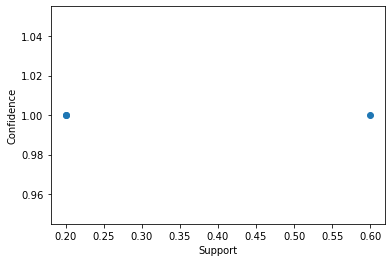

In [32]:
plt.scatter(rules_no_redundancy.support,rules_no_redundancy.confidence);plt.xlabel("Support");plt.ylabel("Confidence")